In [718]:
import numpy as np #backend de pandas y cálculos mátematicos.
import pandas as pd #pandas para el manejo de datasets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max.columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

from scipy.stats import probplot
from xgboost import XGBClassifier

# Exploración de datos

In [526]:
database=pd.read_csv("./BankChurners.csv")
database.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [527]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [528]:
database.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


### Valores de cada columna

In [529]:
for col in database.select_dtypes(['object']).columns:
    print(col, '\n')
    print('Valores unicos: ', database[col].nunique())
    print(database[col].value_counts())
    print('-------------')
    

Attrition_Flag 

Valores unicos:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-------------
Gender 

Valores unicos:  2
F    5358
M    4769
Name: Gender, dtype: int64
-------------
Education_Level 

Valores unicos:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-------------
Marital_Status 

Valores unicos:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
-------------
Income_Category 

Valores unicos:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
-------------
Card_Category 

Valores unicos:  4
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
-------------


### Datos nulos

In [530]:
database.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Proporción de socios del banco según sus estudios:

Text(0, 0.5, 'Socios del Banco')

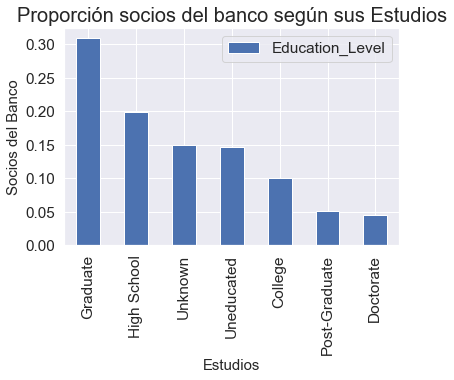

In [531]:
ax=database["Education_Level"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Proporción socios del banco según sus Estudios',fontsize=20)
ax.set_xlabel('Estudios',fontsize=15)
ax.set_ylabel('Socios del Banco',fontsize=15)

Se representa la cantidad de Usuarios existentes y dados de baja de la tarjeta en función a la cantidad de transacciones:

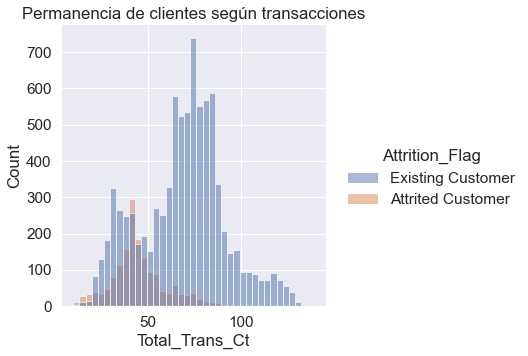

In [532]:
ax = sns.displot(data=database,
           x=database.Total_Trans_Ct,
           hue=database.Attrition_Flag)
ax.set(title = 'Permanencia de clientes según transacciones')

Se representa la cantidad de Usuarios existentes y dados de baja de la tarjeta en función al límite de crédito:

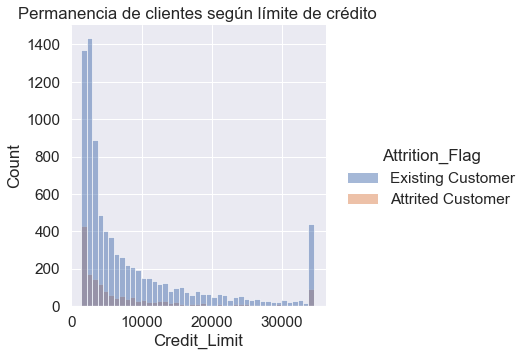

In [533]:
ax = sns.displot(data=database,
           x=database.Credit_Limit,
           hue=database.Attrition_Flag)
ax.set(title = 'Permanencia de clientes según límite de crédito')

In [534]:
dfbaja=database[database["Attrition_Flag"]=="Attrited Customer"] #df con los usuarios dados de baja

In [535]:
dfbaja["Income_Category"].value_counts()

Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64

In [536]:
dfbaja["Income_Category"].value_counts(normalize=True)

Less than $40K   0.376
$40K - $60K      0.167
$80K - $120K     0.149
$60K - $80K      0.116
Unknown          0.115
$120K +          0.077
Name: Income_Category, dtype: float64

Text(0, 0.5, 'Cancelaciones de Tarjeta')

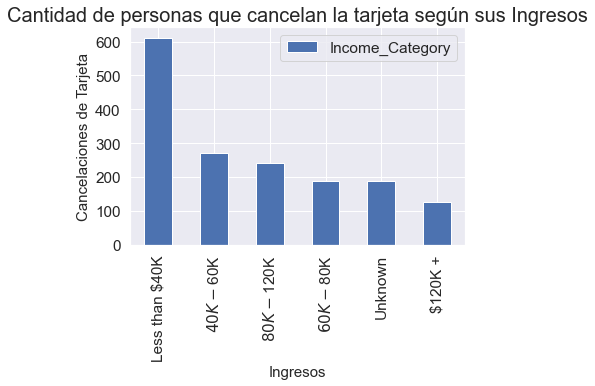

In [537]:
ax=dfbaja["Income_Category"].value_counts().plot(kind="bar")
plt.legend()
ax.set_title('Cantidad de personas que cancelan la tarjeta según sus Ingresos',fontsize=20)
ax.set_xlabel('Ingresos',fontsize=15)
ax.set_ylabel('Cancelaciones de Tarjeta',fontsize=15)

Text(0, 0.5, 'Bajas')

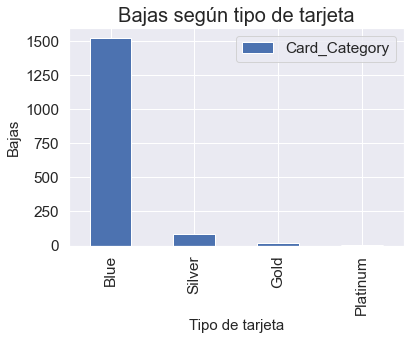

In [538]:
ax=dfbaja["Card_Category"].value_counts().plot(kind="bar")
plt.legend()
ax.set_title('Bajas según tipo de tarjeta',fontsize=20)
ax.set_xlabel('Tipo de tarjeta',fontsize=15)
ax.set_ylabel('Bajas',fontsize=15)

In [539]:
dfbaja.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000,1627.000
mean,735261381.264,46.659,2.403,36.178,3.280,2.693,2.972,8136.039,672.823,7463.216,0.694,3095.026,44.934,0.554,0.162
std,35577253.360,7.666,1.275,7.797,1.578,0.900,1.091,9095.334,921.386,9109.208,0.215,2308.228,14.568,0.227,0.264
min,708083283.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,712371258.000,41.000,2.000,32.000,2.000,2.000,2.000,2114.000,0.000,1587.000,0.544,1903.500,37.000,0.400,0.000
50%,716564433.000,47.000,2.000,36.000,3.000,3.000,3.000,4178.000,0.000,3488.000,0.701,2329.000,43.000,0.531,0.000
75%,768373683.000,52.000,3.000,40.000,5.000,3.000,4.000,9933.500,1303.500,9257.500,0.856,2772.000,51.000,0.692,0.231
max,828294933.000,68.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,1.492,10583.000,94.000,2.500,0.999


Personas que cancelan sus tarjetas de acuerdo a los estudios que poseen:

Text(0, 0.5, 'Clientes dados de baja')

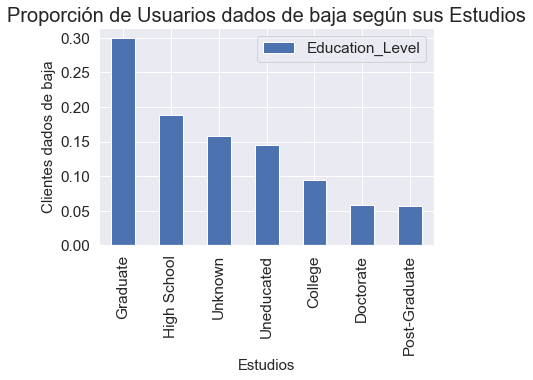

In [540]:
ax=dfbaja["Education_Level"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Proporción de Usuarios dados de baja según sus Estudios',fontsize=20)
ax.set_xlabel('Estudios',fontsize=15)
ax.set_ylabel('Clientes dados de baja',fontsize=15)

Distribución de Usuarios que se dieron de baja, según su edad:

Text(0, 0.5, 'Edad')

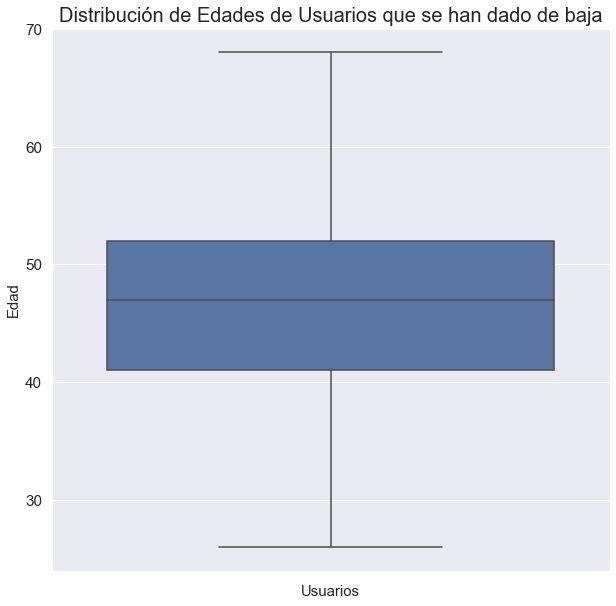

In [541]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=dfbaja["Customer_Age"]) #Boxplot de la base de relojes

ax.set_title('Distribución de Edades de Usuarios que se han dado de baja',fontsize=20)
ax.set_xlabel('Usuarios',fontsize=15)
ax.set_ylabel('Edad',fontsize=15)

In [542]:
database=database.drop(['CLIENTNUM'], axis=1)

Análisis de Database Original vs Database de Usuarios dados de baja

Text(0, 0.5, 'Límite de Crédito')

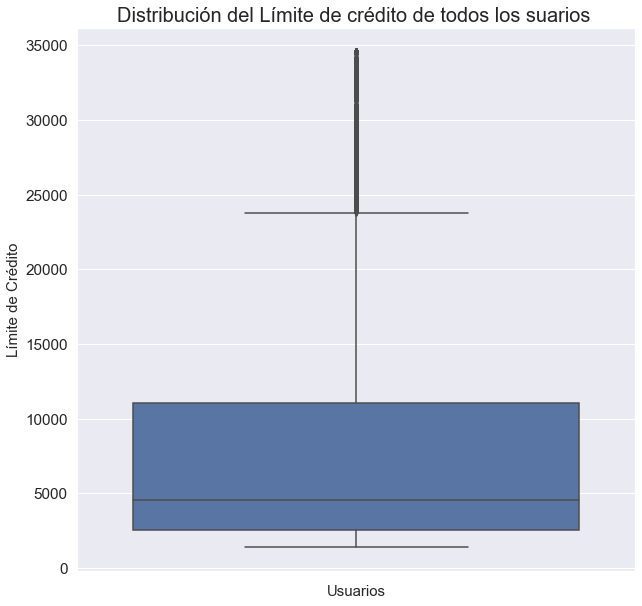

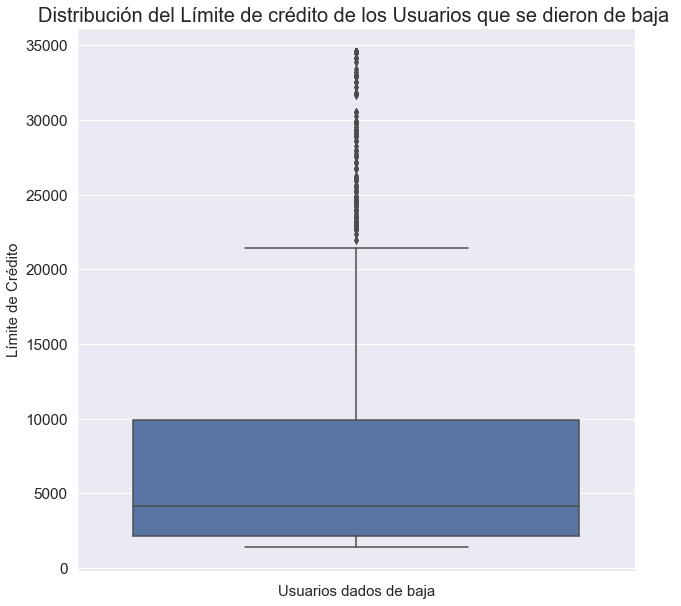

In [543]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=database["Credit_Limit"])

ax.set_title('Distribución del Límite de crédito de todos los suarios ',fontsize=20)
ax.set_xlabel('Usuarios',fontsize=15)
ax.set_ylabel('Límite de Crédito',fontsize=15)

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=dfbaja["Credit_Limit"]) 

ax.set_title('Distribución del Límite de crédito de los Usuarios que se dieron de baja ',fontsize=20)
ax.set_xlabel('Usuarios dados de baja',fontsize=15)
ax.set_ylabel('Límite de Crédito',fontsize=15)

Text(0, 0.5, 'Monto total de transacciones')

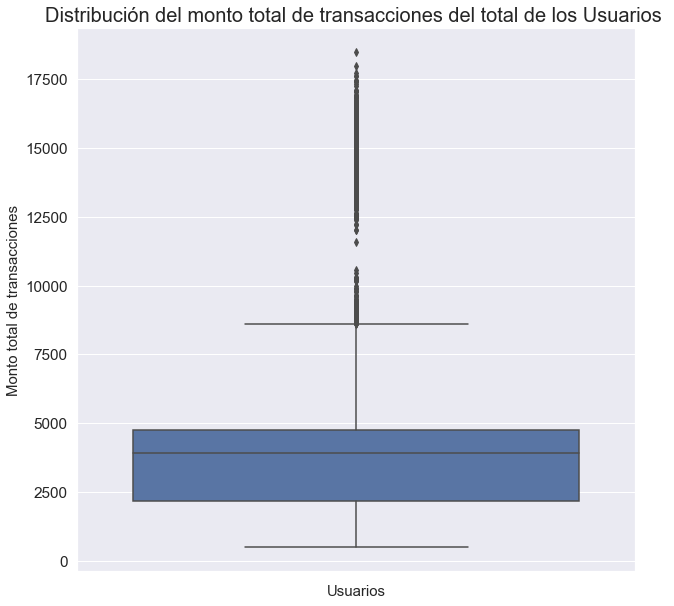

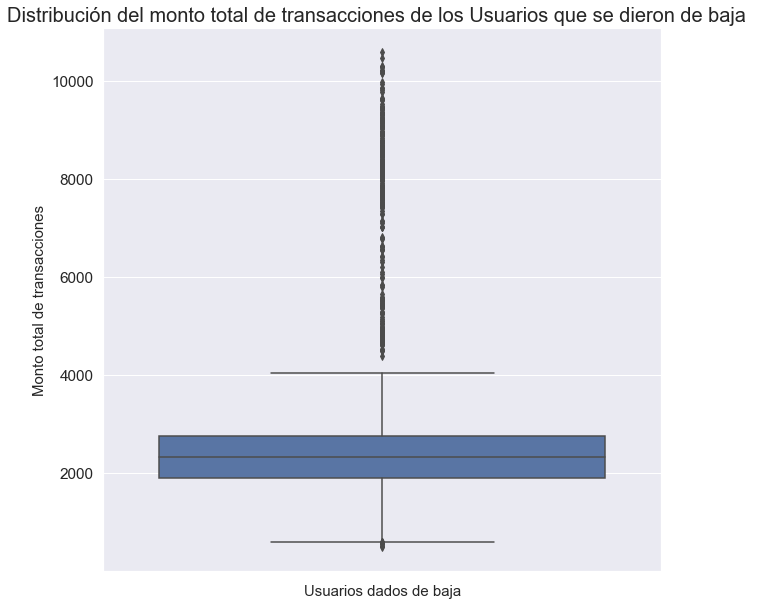

In [544]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=database["Total_Trans_Amt"]) #Boxplot de la base de relojes

ax.set_title('Distribución del monto total de transacciones del total de los Usuarios ',fontsize=20)
ax.set_xlabel('Usuarios',fontsize=15)
ax.set_ylabel('Monto total de transacciones',fontsize=15)

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=dfbaja["Total_Trans_Amt"]) #Boxplot de la base de relojes

ax.set_title('Distribución del monto total de transacciones de los Usuarios que se dieron de baja  ',fontsize=20)
ax.set_xlabel('Usuarios dados de baja',fontsize=15)
ax.set_ylabel('Monto total de transacciones',fontsize=15)

Text(0, 0.5, 'Monto total de transacciones por Usuario')

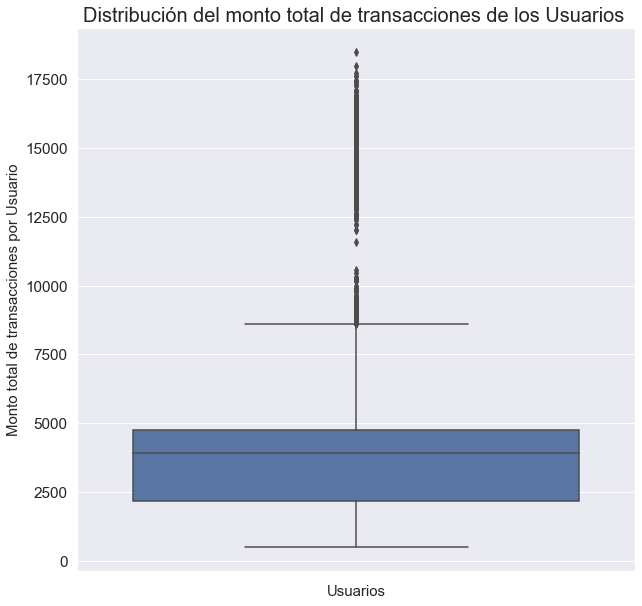

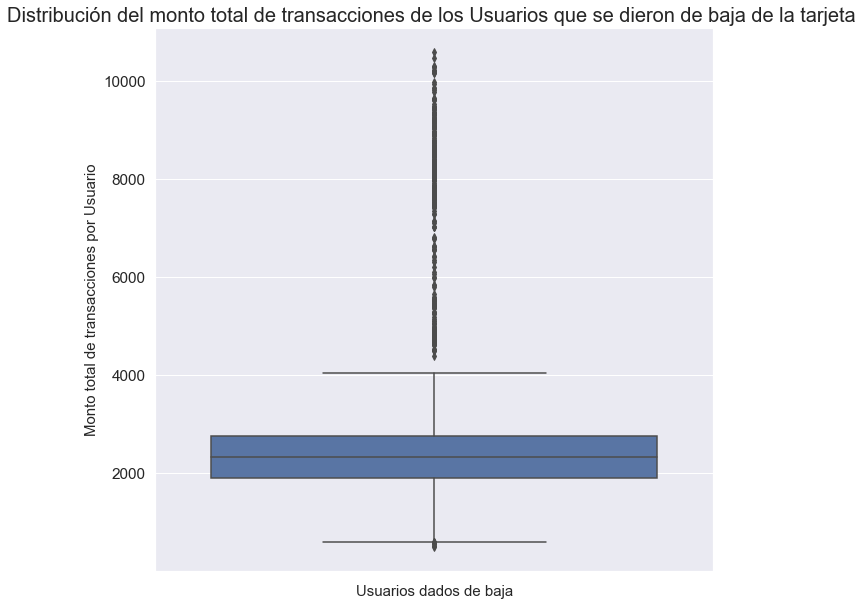

In [545]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=database["Total_Trans_Amt"]) #Boxplot de la base de relojes

ax.set_title('Distribución del monto total de transacciones de los Usuarios ',fontsize=20)
ax.set_xlabel('Usuarios',fontsize=15)
ax.set_ylabel('Monto total de transacciones por Usuario',fontsize=15)

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=dfbaja["Total_Trans_Amt"]) #Boxplot de la base de relojes

ax.set_title('Distribución del monto total de transacciones de los Usuarios que se dieron de baja de la tarjeta ',fontsize=20)
ax.set_xlabel('Usuarios dados de baja',fontsize=15)
ax.set_ylabel('Monto total de transacciones por Usuario',fontsize=15)

In [546]:
database["Total_Trans_Amt"].describe()

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64

In [547]:
dfbaja["Total_Trans_Amt"].describe()

count    1627.000
mean     3095.026
std      2308.228
min       510.000
25%      1903.500
50%      2329.000
75%      2772.000
max     10583.000
Name: Total_Trans_Amt, dtype: float64

# Los usuarios que se dieron de baja tienen un monto mucho menor de transacciones que los que se mantienen; la distribución de los valores de límite de crédito de los usuarios dados de baja también es menor a la de los usuarios vigentes; y la mayor parte de las bajas son en usuarios de entre 40 y 50 años; el 38% de los Usuarios que se han dado de baja ganan menos de 40K; respecto a los montos de transacciones realizadas, los Usuarios dados de baja poseen una distribución con valores bastante menores que los Usuarios que mantienen la tarjeta. 

# Limpieza y Tratamiento de Datos

 ###  Análisis de datos "Unknown" :

In [548]:
dataunk=database[database["Education_Level"]=="Unknown"]

In [549]:
dataunk.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
11,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.000,1587,7508.000,1.433,1314,26,1.364,0.174
15,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230
17,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.000,1291,12244.000,0.653,1028,21,1.625,0.095
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.000,1560,932.000,0.573,1126,23,0.353,0.626


Text(0.5, 0, 'Ingresos')

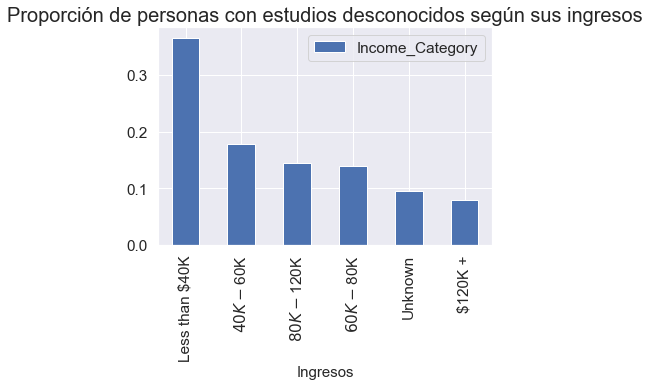

In [550]:
ax=dataunk["Income_Category"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Proporción de personas con estudios desconocidos según sus ingresos',fontsize=20)
ax.set_xlabel('Ingresos',fontsize=15)


Se reemplazan los datos nulos (Unknown) de Education_Level con valores random:

In [551]:
database.Education_Level=database.Education_Level.replace('Unknown', np.nan)

In [552]:
database.Education_Level.isnull().sum()

1519

In [553]:
database["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [554]:
def sampleo_edu(x):
    import random
    if pd.isnull(x):
        res=np.random.choice(database[database.Education_Level.notnull()]['Education_Level'])
    else:
        res=x
    return res

In [555]:
database['Education_Level']=database['Education_Level'].apply(sampleo_edu)

In [556]:
database["Education_Level"].value_counts()

Graduate         3698
High School      2378
Uneducated       1740
College          1172
Post-Graduate     606
Doctorate         533
Name: Education_Level, dtype: int64

Se reemplazan los datos nulos (Unknown) de Income_Category:

In [557]:
database.Income_Category=database.Income_Category.replace('Unknown', np.nan)

In [558]:
database.Income_Category.isnull().sum()

1112

In [559]:
database["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [560]:
def sampleo_inc(x):
   
    if pd.isnull(x):
        res=np.random.choice(database[database.Income_Category.notnull()]['Income_Category'])
    else:
        res=x
    return res

In [561]:
database['Income_Category']=database['Income_Category'].apply(sampleo_inc)

In [562]:
database["Income_Category"].value_counts()

Less than $40K    3984
$40K - $60K       2007
$80K - $120K      1729
$60K - $80K       1573
$120K +            834
Name: Income_Category, dtype: int64

## Correlación de las diferentes categorías

In [563]:
database.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000,-0.122,0.789,-0.011,0.054,-0.018,0.002,0.015,0.001,-0.062,-0.046,-0.067,-0.012,0.007
Dependent_count,-0.122,1.000,-0.103,-0.039,-0.011,-0.041,0.068,-0.003,0.068,-0.035,0.025,0.050,0.011,-0.037
Months_on_book,0.789,-0.103,1.000,-0.009,0.074,-0.011,0.008,0.009,0.007,-0.049,-0.039,-0.050,-0.014,-0.008
Total_Relationship_Count,-0.011,-0.039,-0.009,1.000,-0.004,0.055,-0.071,0.014,-0.073,0.050,-0.347,-0.242,0.041,0.068
Months_Inactive_12_mon,0.054,-0.011,0.074,-0.004,1.000,0.029,-0.020,-0.042,-0.017,-0.032,-0.037,-0.043,-0.039,-0.008
Contacts_Count_12_mon,-0.018,-0.041,-0.011,0.055,0.029,1.000,0.021,-0.054,0.026,-0.024,-0.113,-0.152,-0.095,-0.055
Credit_Limit,0.002,0.068,0.008,-0.071,-0.020,0.021,1.000,0.042,0.996,0.013,0.172,0.076,-0.002,-0.483
Total_Revolving_Bal,0.015,-0.003,0.009,0.014,-0.042,-0.054,0.042,1.000,-0.047,0.058,0.064,0.056,0.090,0.624
Avg_Open_To_Buy,0.001,0.068,0.007,-0.073,-0.017,0.026,0.996,-0.047,1.000,0.008,0.166,0.071,-0.010,-0.539
Total_Amt_Chng_Q4_Q1,-0.062,-0.035,-0.049,0.050,-0.032,-0.024,0.013,0.058,0.008,1.000,0.040,0.005,0.384,0.035


<AxesSubplot:>

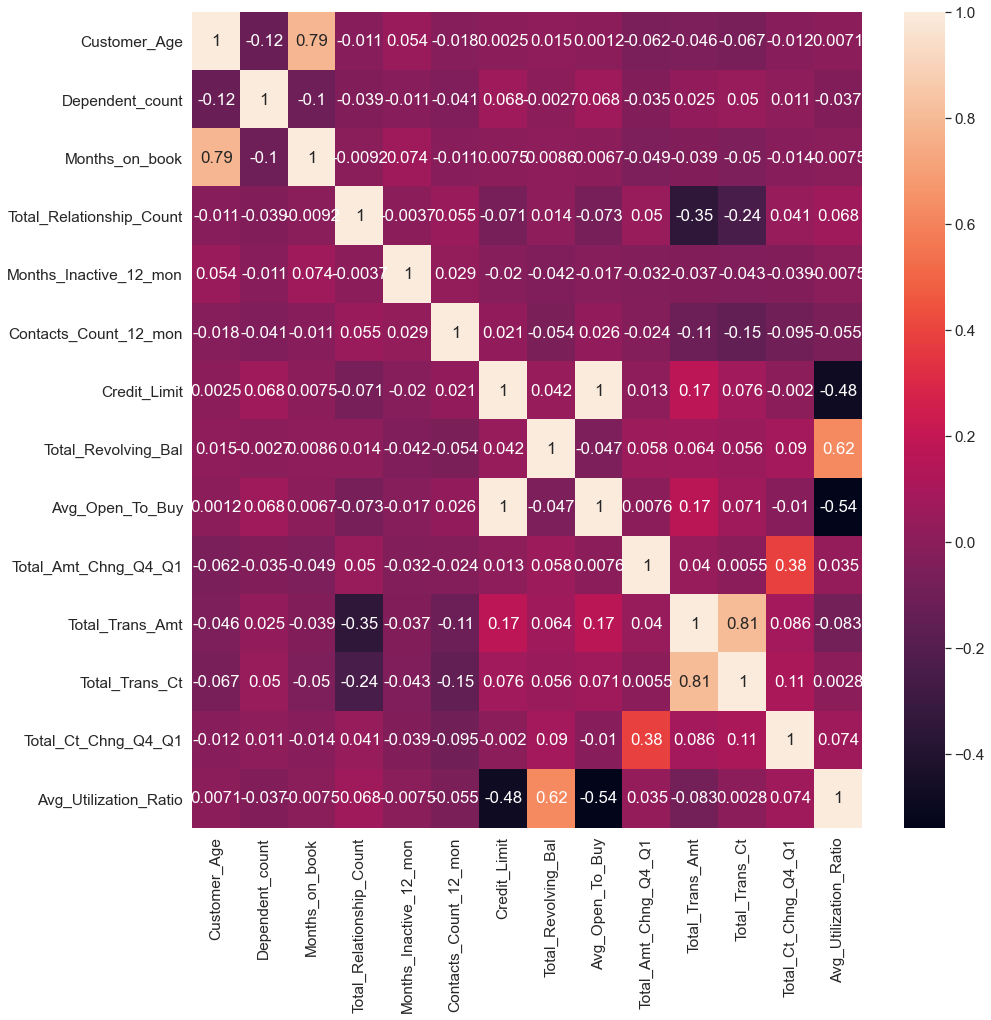

In [564]:
plt.figure(figsize=(15,15))
sns.heatmap(database.corr(),
           annot=True)

## La variable a predecir "Attrition_Flag" será nuestro objetivo "1", los usuarios existentes tomaran el valor "0"

In [565]:
database['Attrition_Flag'] = database['Attrition_Flag'].replace('Existing Customer',0)
database['Attrition_Flag'] = database['Attrition_Flag'].replace('Attrited Customer',1)

In [566]:
database[["Attrition_Flag"]].value_counts()

Attrition_Flag
0                 8500
1                 1627
dtype: int64

In [567]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<AxesSubplot:>

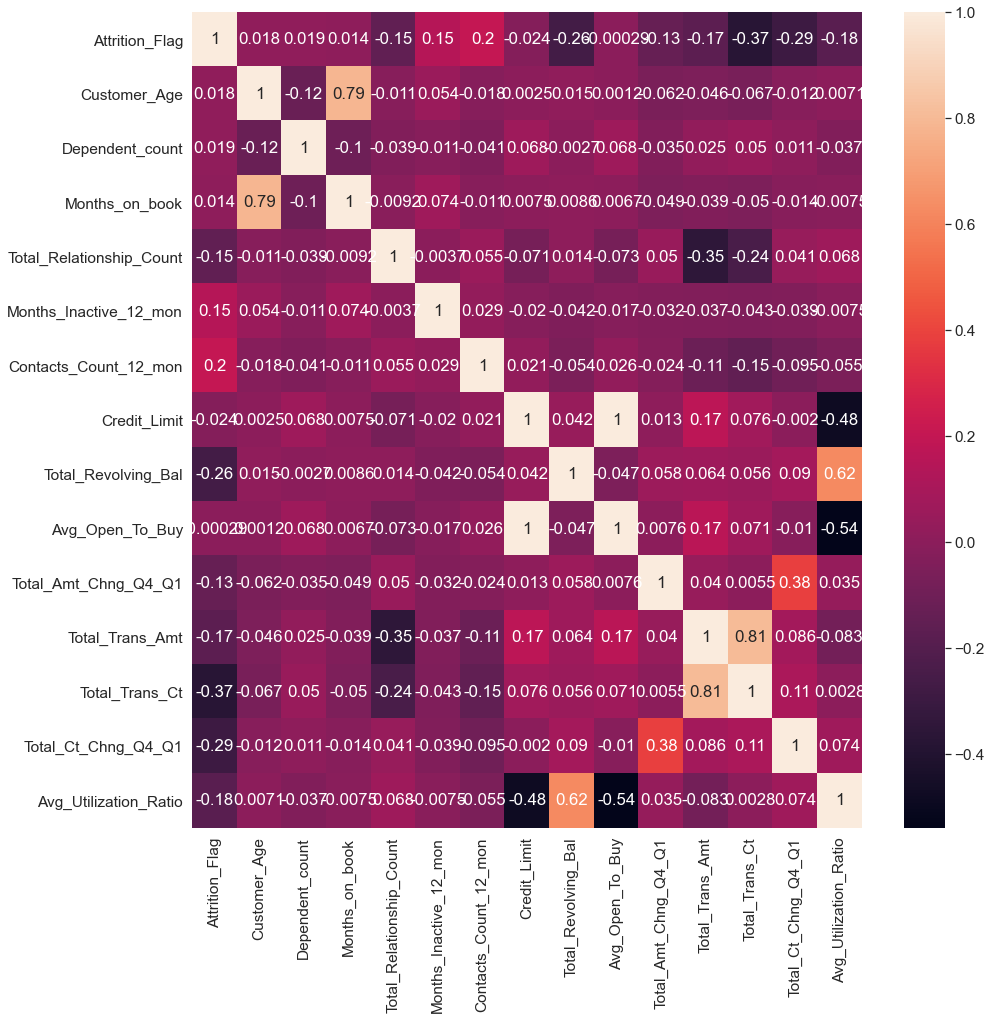

In [568]:
plt.figure(figsize=(15,15))
sns.heatmap(database.corr(),
           annot=True)

One Hot Encoder para dividir en columnas la columna Card_Category

In [569]:
enc_card=OneHotEncoder()
cardcat=pd.DataFrame(enc_card.fit_transform(database[['Card_Category']]).toarray(), 
             columns=['Card_Blue', 'Card_Gold', 'Card_Platinum', "Card_Silver"])
database=database.join(cardcat)

In [570]:
database.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,1.000,0.000,0.000,0.000
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1.000,0.000,0.000,0.000
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,1.000,0.000,0.000,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,1.000,0.000,0.000,0.000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,1.000,0.000,0.000,0.000


In [571]:
database["Card_Blue"].value_counts()

1.000    9436
0.000     691
Name: Card_Blue, dtype: int64

Solo nos quedaremos con la columna 'Card_Blue' categoría donde se encuentran la mayor cantidad de fuga de usuarios

In [572]:
database=database.drop(['Card_Silver','Card_Platinum','Card_Gold'], axis=1)

In [573]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Se reemplaza la Columna "Income_Category" mediante el tipo OrdinalEncoder

In [574]:
mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}

In [575]:
database['Income_Code'] = database['Income_Category'].replace(mapper)

In [576]:
database.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Income_Code
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,1.000,3
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1.000,1
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,1.000,4
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,1.000,1
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,1.000,3


In [577]:
database=database.drop(['Income_Category'], axis=1)

In [578]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

Separaremos los niveles de Educación en solo 2 grandes grupos posibles, ya que hay mucha similitud en el comportamiento de fuga
entre sí de los niveles más bajos y de permanencia en los más altos

In [579]:
map_ed = {'Uneducated':1 ,  'Graduate':1, 'High School':1, 'College':0,  'Doctorate':0, 'Post-Graduate':0}
database['Education_Code'] = database['Education_Level'].replace(map_ed)
database['Education_Code'].value_counts()

1    7816
0    2311
Name: Education_Code, dtype: int64

<AxesSubplot:>

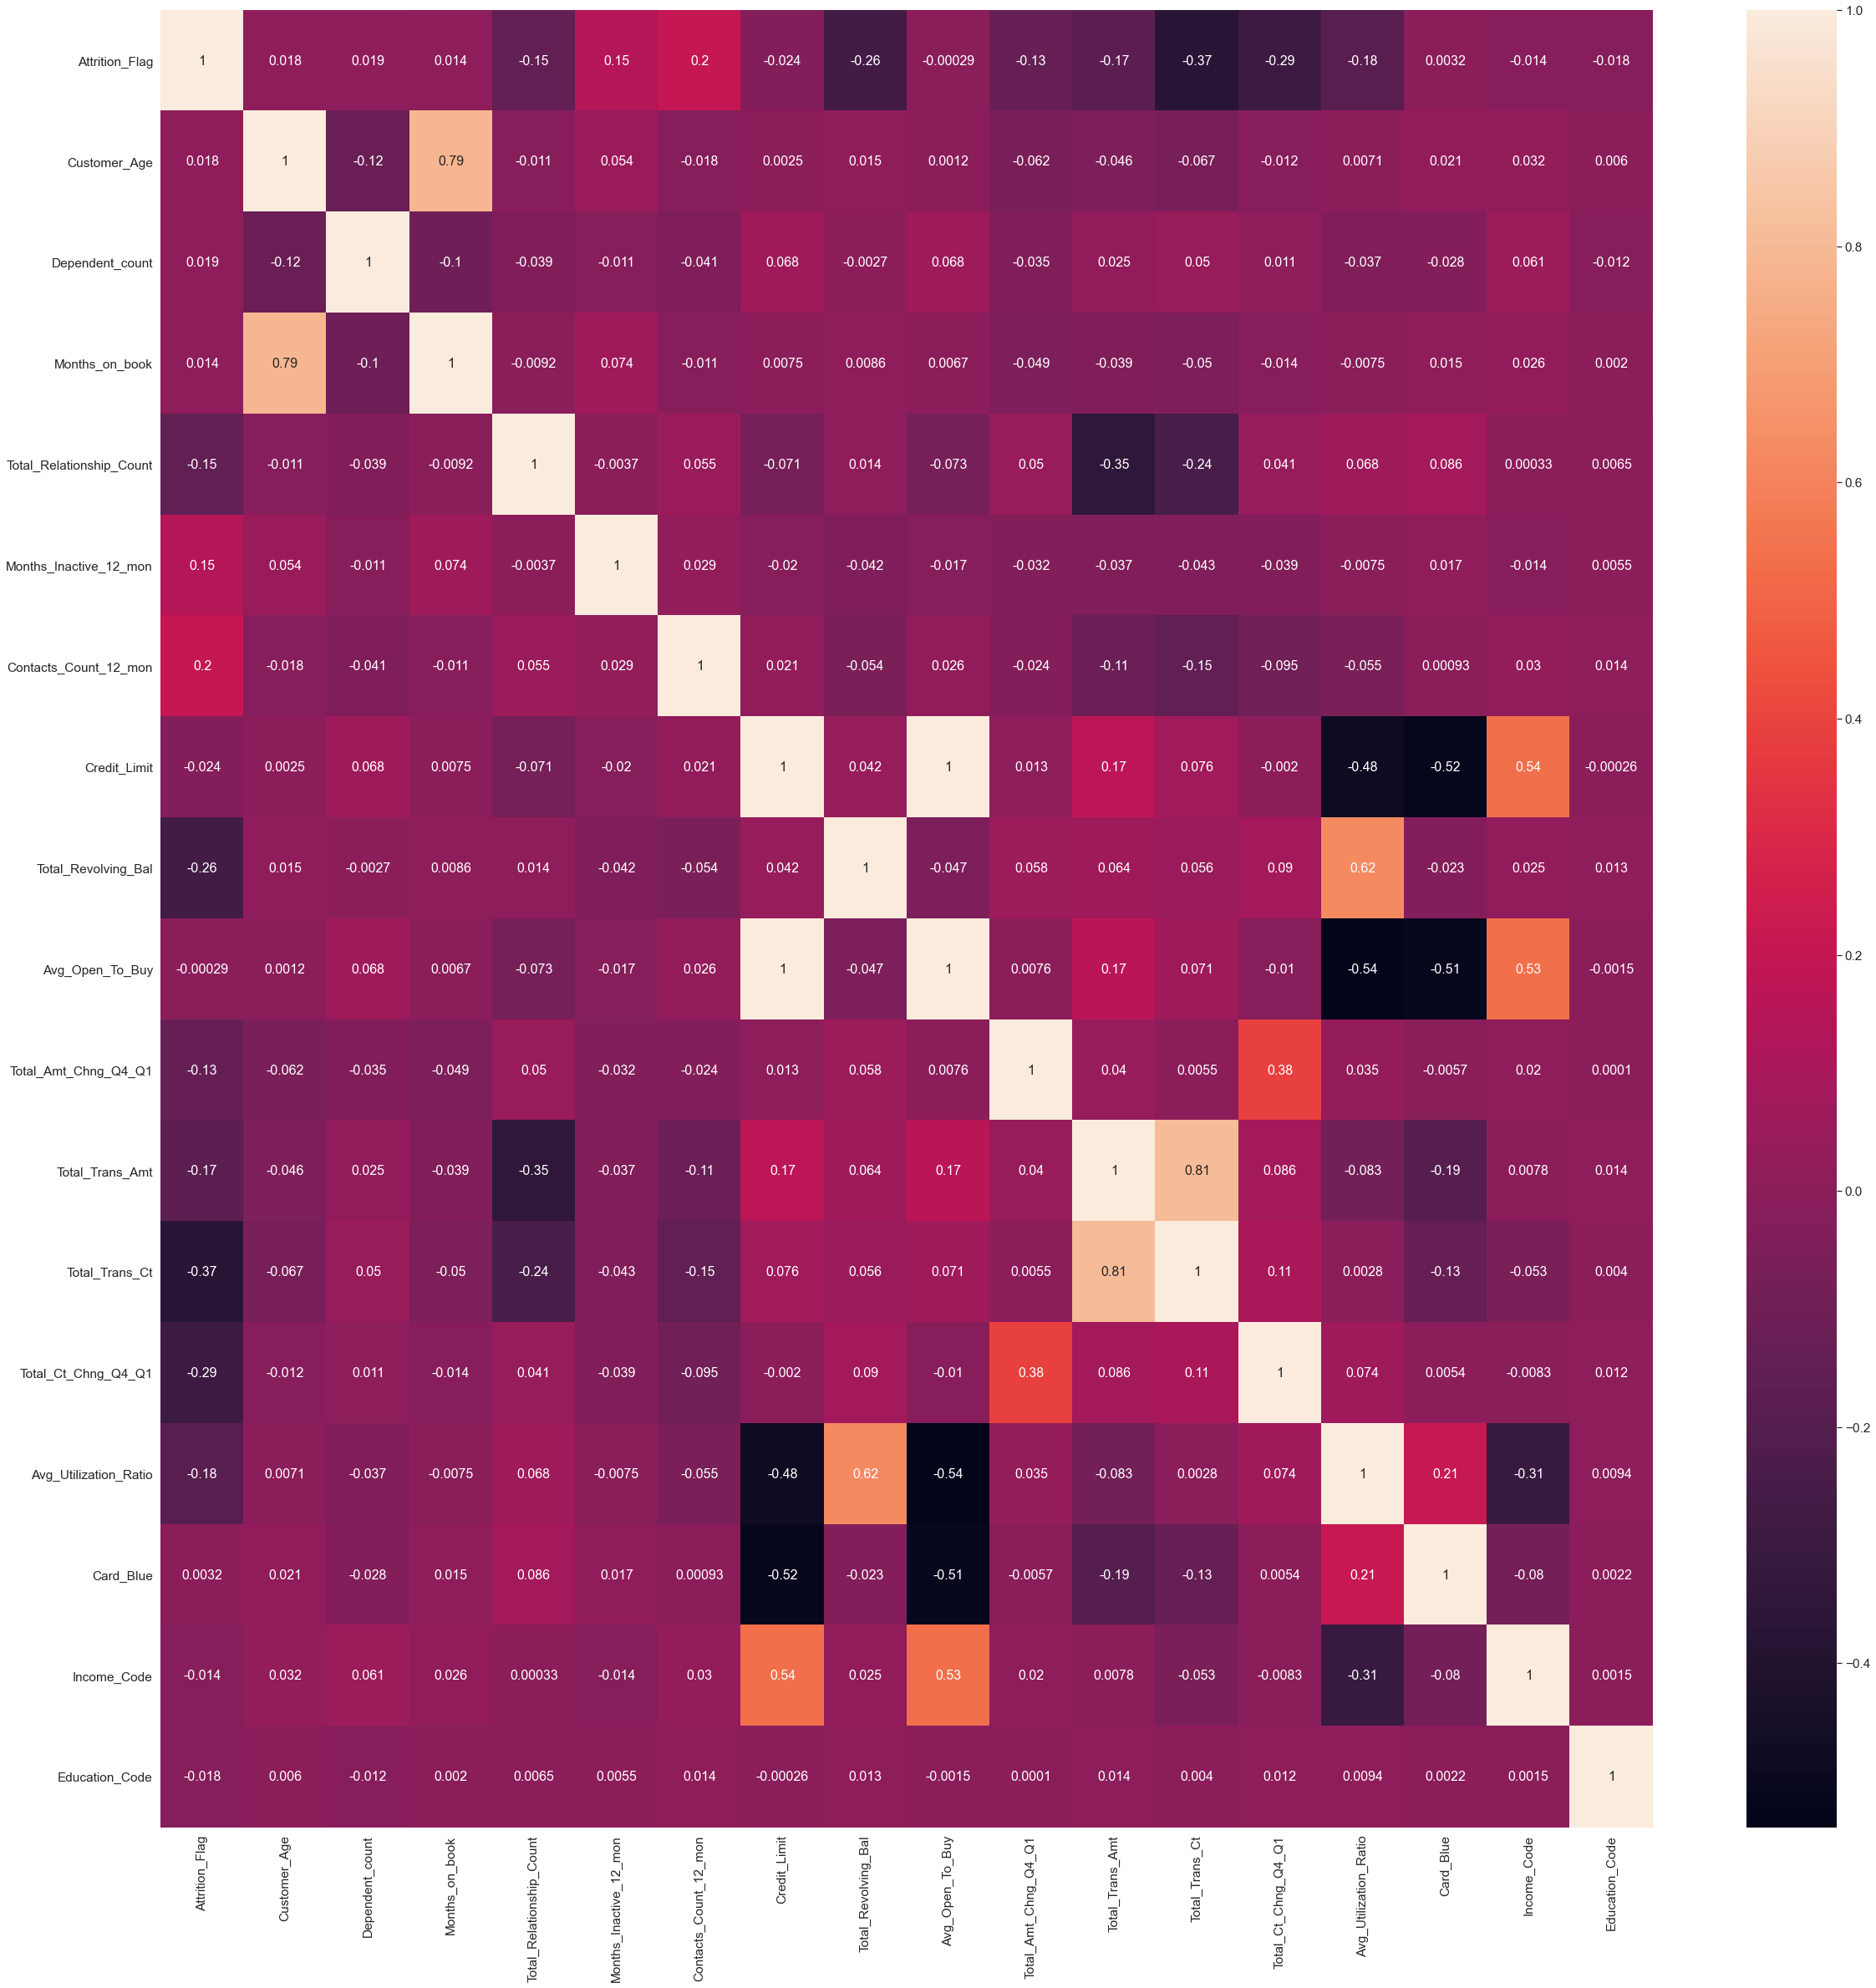

In [580]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1.4)
sns.heatmap(database.corr(),
           annot=True,annot_kws={"size": 16})

# OBSERVACION:

### En resumen el preprocesamiento realizado anteriormente se puede englobar en una función 'preprocess' (de esta forma lograremos un mejor orden en el Notebook) para ello volvemos a cargar la Base de Datos original y luego la preprocesamos por medio de la función "preprocess" previamente mencionada:

In [656]:
database=pd.read_csv("./BankChurners.csv")

In [657]:
def sample_column(df,column):
    df[column] = df[column].replace('Unknown', np.random.choice(df[df[column]!='Unknown'][column]))
   
    
    return df
      
def le_attrition(df):
    df['Attrition_Flag'] = df['Attrition_Flag'].replace('Existing Customer',0)
    df['Attrition_Flag'] = df['Attrition_Flag'].replace('Attrited Customer',1)
    return df

def transform_edu(df):
    map_ed = {'Uneducated':1 ,  'Graduate':1, 'High School':1, 'College':0,  'Doctorate':0, 'Post-Graduate':0}
    df['Education_Code'] = df['Education_Level'].replace(map_ed)
    return df

def transform_inc(df):
    mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}
    df['Income_Code'] = df['Income_Category'].replace(mapper)
    return df

def transform_tcard(df):
    enc_card = OneHotEncoder()
    cardcat = pd.DataFrame(enc_card.fit_transform(df[['Card_Category']]).toarray(), 
    columns = ['Card_Blue', 'Card_Gold', 'Card_Platinum', "Card_Silver"])
    df = df.join(cardcat)
    df = df.drop(['Card_Silver','Card_Platinum','Card_Gold'], axis=1)
    return df


In [658]:
def preprocess(df):
    df = sample_column(df,'Education_Level')
    df = sample_column(df,'Income_Category')
    df = le_attrition(df)
    df =  transform_edu(df)
    df = transform_inc(df)
    df = transform_tcard(df)
    
    return df
    
    

In [659]:
database.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [660]:
database.shape

(10127, 21)

In [661]:
database = preprocess(database)

In [662]:
database.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Code,Income_Code,Card_Blue
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,0.161,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275,0.804,2.196,0.932
std,36903783.450,0.367,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276,0.397,1.347,0.252
min,708082083.000,0.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000,0.000,1.000,0.000
25%,713036770.500,0.000,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023,1.000,1.000,1.000
50%,717926358.000,0.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176,1.000,2.000,1.000
75%,773143533.000,0.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503,1.000,3.000,1.000
max,828343083.000,1.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999,1.000,5.000,1.000


In [663]:
database.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Code,Income_Code,Card_Blue
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,1,3,1.000
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1,1,1.000
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,1,4,1.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,1,1,1.000
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,1,3,1.000


In [664]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [665]:
database.shape

(10127, 24)

# Modelado:

## Las columnas utilizadas para los modelos predictivos serán:'Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code'

In [666]:
X=database[['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code']] 

In [667]:
y=database['Attrition_Flag']

In [668]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=33)

In [669]:
X_train.shape

(7595, 6)

In [670]:
print('Cantidad de datos para entrenamiento: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))

Cantidad de datos para entrenamiento:  7595
Cantidad de datos para test:  2532


In [671]:
y_train.shape

(7595,)

In [672]:
X_test.shape

(2532, 6)

In [673]:
y_test.shape

(2532,)

Modelo de Regresión Logística:

In [674]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(X_train, y_train)

C:\Users\Fede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [675]:
print('Vector de coeficientes de la función lineal: ', logist.coef_)
print('Ordenada en el origen (W0): ', logist.intercept_)

Vector de coeficientes de la función lineal:  [[-5.23095980e-02 -9.16033106e-04 -2.31932114e+00 -7.32603210e-02
   8.28967445e-01  1.63665115e-01]]
Ordenada en el origen (W0):  [2.92173268]


In [676]:
y_pred_train = logist.predict(X_train)

In [677]:
logist.score(X_train, y_train)

0.8804476629361422

In [678]:
y_pred_test = logist.predict(X_test)

In [679]:
logist.score(X_test, y_test)

0.8803317535545023

Métricas de Logistic Regression:

In [680]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.8803317535545023
Precision Score : 0.7358490566037735
Recall Score : 0.3870967741935484
F1 Score : 0.5073170731707317


In [681]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[2073,   56],
       [ 247,  156]], dtype=int64)

In [682]:
print('Etiquetas de test reales:    ', y_test[:18])
print('Etiquetas de test predichas: ', y_pred_test[:18])

Etiquetas de test reales:     9616    0
7865    0
73      0
596     1
114     0
8521    0
2764    0
3257    0
463     1
253     1
4541    1
6528    0
4863    1
899     0
4705    1
6689    0
6313    0
1685    0
Name: Attrition_Flag, dtype: int64
Etiquetas de test predichas:  [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]


Modelo de KNN:

In [683]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [684]:
knn.score(X_train, y_train)

0.9100724160631994

In [685]:
knn.fit(X_test, y_test)

KNeighborsClassifier()

In [686]:
knn.score(X_test, y_test)

0.9083728278041074

In [687]:
y_knn_test = knn.predict(X_test)

Métricas de KNN:

In [688]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_knn_test)))
print('Precision Score : ' + str(precision_score(y_test,y_knn_test)))
print('Recall Score : ' + str(recall_score(y_test,y_knn_test)))
print('F1 Score : ' + str(f1_score(y_test,y_knn_test)))

Accuracy Score : 0.9083728278041074
Precision Score : 0.7647058823529411
Recall Score : 0.6129032258064516
F1 Score : 0.6804407713498624


In [689]:
confusion_matrix(y_test, y_knn_test)

array([[2053,   76],
       [ 156,  247]], dtype=int64)

Si escalamos los datos de la columna 'Total_Trans_Ct' al ser un modelo de distancia puede mejorar sus métricas.
Veamos: 

In [690]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_knn = database.copy()


df_knn[['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1']] = scaler.fit_transform(df_knn[['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1']])
df_knn.shape

(10127, 24)

In [691]:
X_scale = df_knn[['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code']] 
y_scale = df_knn['Attrition_Flag']

X_scale_train, X_scale_test, y_scale_train, y_scale_test=train_test_split(X, y, test_size=0.25, random_state=33)
X_scale_train.shape
knn_scale = KNeighborsClassifier(n_neighbors=5)
knn_scale.fit(X_scale_train, y_scale_train)

KNeighborsClassifier()

In [692]:
knn_scale.score(X_scale_test, y_scale_test)

0.8906003159557662

In [693]:
knnscale_test = knn.predict(X_scale_test)

In [694]:
print('Accuracy Score : ' + str(accuracy_score(y_scale_test,knnscale_test)))
print('Precision Score : ' + str(precision_score(y_scale_test,knnscale_test)))
print('Recall Score : ' + str(recall_score(y_scale_test,knnscale_test)))
print('F1 Score : ' + str(f1_score(y_scale_test,knnscale_test)))

Accuracy Score : 0.9083728278041074
Precision Score : 0.7647058823529411
Recall Score : 0.6129032258064516
F1 Score : 0.6804407713498624


In [695]:
confusion_matrix(y_scale_test, knnscale_test)

array([[2053,   76],
       [ 156,  247]], dtype=int64)

No hay mejora trascendente

Modelo de Árbol:

In [696]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [697]:
model_tree=DecisionTreeClassifier(criterion='gini', max_depth=10)

In [698]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [699]:
model_tree.score(X_test, y_test)

0.8767772511848341

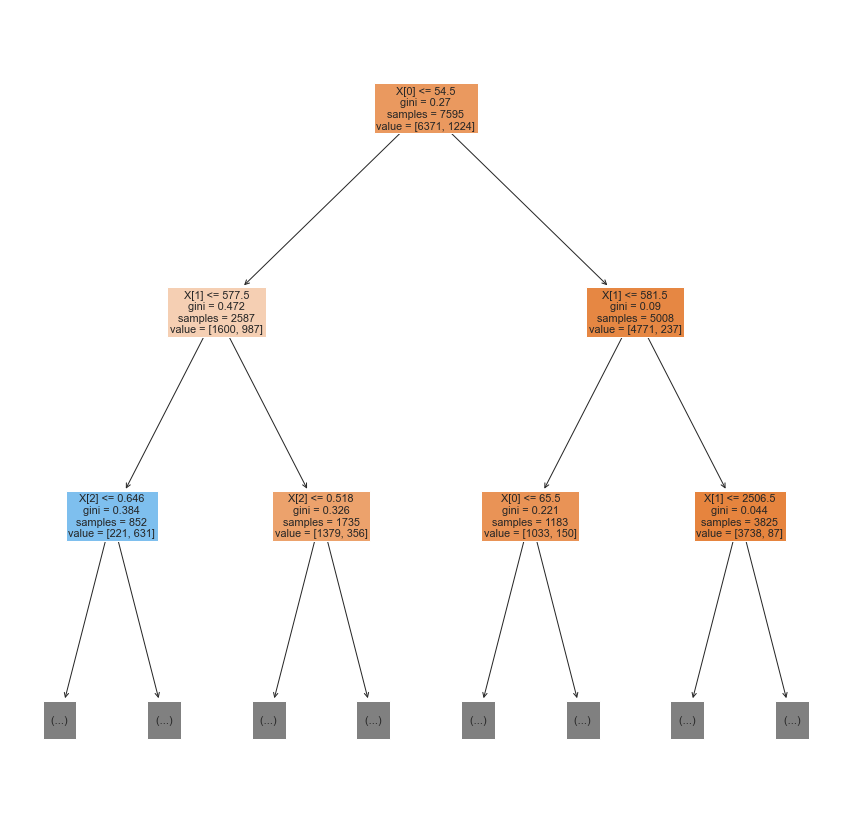

In [700]:
fig=plt.figure(figsize=(15,15))
_=tree.plot_tree(model_tree,
                filled=True,
                max_depth=2)

In [701]:
y_pred_tree=model_tree.predict(X_test)

In [702]:
model_tree.score(X_test, y_test)

0.8767772511848341

Métricas de Árbol:

In [703]:
confusion_matrix(y_test, y_pred_tree)

array([[2003,  126],
       [ 186,  217]], dtype=int64)

In [704]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_tree)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_tree)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_tree)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_tree)))

Accuracy Score : 0.8767772511848341
Precision Score : 0.6326530612244898
Recall Score : 0.5384615384615384
F1 Score : 0.5817694369973191


Random Forest:

In [705]:
from sklearn.ensemble import RandomForestClassifier

In [706]:
clf = RandomForestClassifier(n_estimators=5, criterion='gini')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8744075829383886

Métricas de Random Forest :

In [707]:
y_pred_rf = clf.predict(X_test)

In [708]:
confusion_matrix(y_test, y_pred_rf)

array([[2003,  126],
       [ 192,  211]], dtype=int64)

In [709]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf)))

Accuracy Score : 0.8744075829383886
Precision Score : 0.6261127596439169
Recall Score : 0.5235732009925558
F1 Score : 0.5702702702702702


## XGBOOST

In [710]:
clf2 = XGBClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

C:\Users\Fede\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8929699842022117

In [711]:
y_pred_boost = clf2.predict(X_test)

Métricas de XGBOOST:

In [712]:
confusion_matrix(y_test, y_pred_boost)

array([[2024,  105],
       [ 166,  237]], dtype=int64)

In [713]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_boost)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_boost)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_boost)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_boost)))

Accuracy Score : 0.8929699842022117
Precision Score : 0.6929824561403509
Recall Score : 0.5880893300248139
F1 Score : 0.636241610738255


## Para compensar las categorías desbalanceadas se realiza un oversampling

In [714]:
oversample=RandomOverSampler(sampling_strategy=0.5)
X_train_over, y_train_over=oversample.fit_resample(X_train, y_train)

In [715]:
X_train_over=pd.DataFrame(X_train_over, columns=X_train.columns)

### Veamos ahora como funciona cada método haciendo una validación con K-FOLD

In [716]:
from sklearn.model_selection import KFold, cross_validate

In [717]:
folds= KFold(n_splits=4, shuffle=True, random_state=1)
metricas=['accuracy', 'recall', 'precision', 'f1']
modelos=[LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=5),
        DecisionTreeClassifier(criterion='gini', max_depth=10),
        RandomForestClassifier(n_estimators=5, criterion='gini'),
        XGBClassifier()
        
    
]

In [640]:
for modelo in modelos:
    
    fold=KFold(n_splits=4, random_state=1, shuffle=True)
    scores=cross_validate(modelo,
                         X_train_over,
                         y_train_over,
                         scoring=metricas,
                         cv=fold,
                         n_jobs=-1)
    
    print(str(modelo), '\n')
    print('Accuracy:', scores['test_accuracy'].mean())
    print('Accuracy:', scores['test_accuracy'])
    print('Recall:', scores['test_recall'].mean())
    print('Precision:', scores['test_precision'].mean())
    print('F1:', scores['test_f1'].mean())
    print('----------------------- \n')

LogisticRegression() 

Accuracy: 0.8125784847216408
Accuracy: [0.81247384 0.81121808 0.81163667 0.81498535]
Recall: 0.6486312213939761
Precision: 0.7544622802631498
F1: 0.6975146113355009
----------------------- 

KNeighborsClassifier() 

Accuracy: 0.8437630807869401
Accuracy: [0.8334031  0.84805358 0.85140226 0.84219339]
Recall: 0.7929177642877479
Precision: 0.7518422718525339
F1: 0.771764223021921
----------------------- 

DecisionTreeClassifier(max_depth=10) 

Accuracy: 0.8802846379238175
Accuracy: [0.87149435 0.88028464 0.87986605 0.88949351]
Recall: 0.8297772020558035
Precision: 0.8141035341847171
F1: 0.8217310097880495
----------------------- 

RandomForestClassifier(n_estimators=5) 

Accuracy: 0.9193177061532022
Accuracy: [0.92046882 0.91586438 0.91753872 0.92339891]
Recall: 0.9179763041551029
Precision: 0.851564134670621
F1: 0.8834183284872037
----------------------- 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, cols

# Se ve una clara mejora con el OverSampling para balancear clases y contamos con métricas confiables en todos los modelos

### Por último buscamos optimizar hiperparametros mediante GridSearch para KNN y Árbol de decisión

In [641]:
from sklearn.model_selection import GridSearchCV

Árbol de decisión

In [642]:
params={'criterion':['gini','entropy'], 'max_depth':[2,3,4,5,6,7,10]}

In [643]:
grid = GridSearchCV(model_tree,param_grid=params)


In [644]:
grid.fit(X_train_over, y_train_over)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 10]})

In [645]:
grid.score(X_test, y_test)

0.8661137440758294

In [646]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.879):
{'criterion': 'gini', 'max_depth': 10}


KNN

In [647]:
params_k = {'weights':['uniform','distance'], 'n_neighbors':[3,4,5,6,7,10,12]}

In [648]:
grid2 = GridSearchCV(knn,param_grid=params_k)


In [649]:
grid2.fit(X_train_over, y_train_over)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 10, 12],
                         'weights': ['uniform', 'distance']})

In [650]:
grid2.score(X_test, y_test)

0.8451816745655608

In [651]:
print("Best parameter (CV score=%0.3f):" % grid2.best_score_)
print(grid2.best_params_)

Best parameter (CV score=0.913):
{'n_neighbors': 12, 'weights': 'distance'}


#### No hay mejora en ninguno de los dos casos

# Explainability

In [652]:
modelos=[KNeighborsClassifier(n_neighbors=5),
        DecisionTreeClassifier(criterion='gini', max_depth=10),
        RandomForestClassifier(n_estimators=5, criterion='gini'),
        XGBClassifier()
        
    
]

In [653]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [654]:
def plot_roc_curve_2(fpr, tpr):
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i  in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(modelos[i])[:10]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


  KNeighborsClass    

0.9741360910542693

  DecisionTreeCla    

0.9763267474503656

  RandomForestCla    

0.9986831273083712
[10:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Fede\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




  XGBClassifier(b    

0.9913983520795637


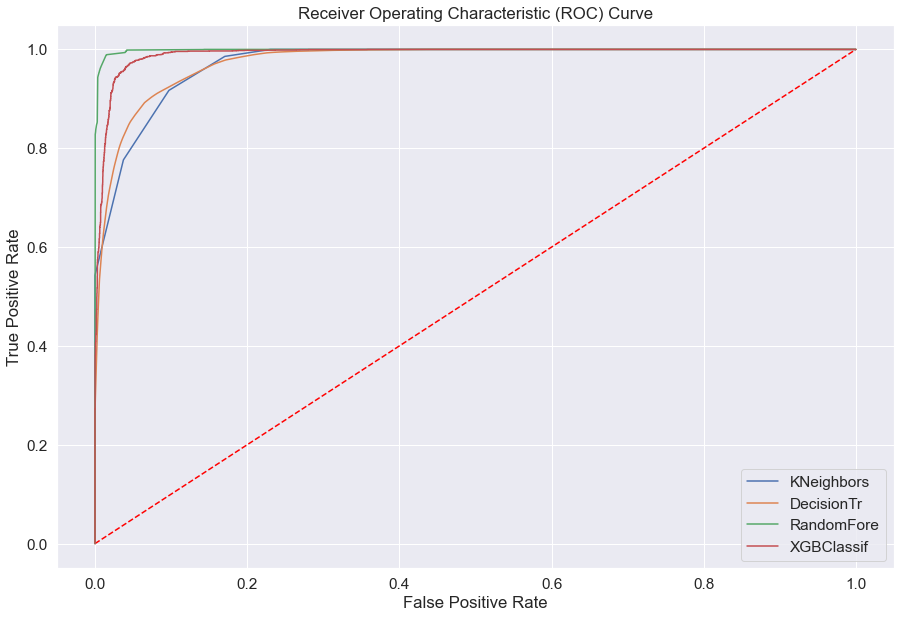

In [655]:
fpr_list=[]
tpr_list=[]

for i in range(0, len(modelos)):
    modelo=modelos[i]
    
    
    modelo.fit(X_train_over, y_train_over)
    probs = modelo.predict_proba(X_train_over)
    probs = probs[:,1]
    fpr, tpr, umbral = roc_curve(y_train_over, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    print('\n \033[1m', str(modelo)[:15], '  \033[0;0m \n')
    print(roc_auc_score(y_train_over, probs))
plot_roc_curve_2(fpr_list, tpr_list)

## Vemos un buen comportamiento en los 4 modelos. Sí la gerencia desea una mayor exhaustividad en las predicciones a costa de perder "trazabilidad" del algoritmo se debe optar por XGB Classifier o Random Forest. Sí un intervalo de precisión y recall algo menor (aunque con valores aún efectivos) puede ser aceptable con tal de entender el proceso de clasificación, se puede confiar en un Decision Tree o KNeighboors.